In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows', None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,r2_score

In [2]:
# LOAD AND EXPLORE THE DATASET

In [26]:
df = pd.read_csv(r"C:\Users\shan2\pandas\OnlineSalesData.csv")

In [27]:
print("Shape of the datset", df.shape)

Shape of the datset (240, 9)


In [28]:
print(("\n First Five Rows"))
df.head()


 First Five Rows


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [29]:
print("\n DataTypes ofColumns\n ")
df.dtypes


 DataTypes ofColumns
 


Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [39]:
df.describe(include='object')

,Date,Product Category,Product Name,Region,Payment Method
count,240,240,240,240,240
unique,240,6,232,3,3
top,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,North America,Credit Card
freq,1,40,2,80,120


In [30]:
print("Statical Overview of dataset\n ")
df.describe()

Statical Overview of dataset
 


,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [81]:
# DATA CLEANING AND PRE-PROCESSING

In [65]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')


In [38]:
df = df[(df['Unit Price'] > 0) & (df['Units Sold'] > 0)]
print("Cleaned Dataset:")
print(df.describe())

Cleaned Dataset:
       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


In [31]:
print("Information of dataset \n")
df.info()

Information of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [32]:
print("Null Values \n", df.isna().sum()[df.isna().sum()>0])

Null Values 
 Series([], dtype: int64)


In [33]:
print("Columns and there number of unique values \n")
for columns in df.columns:
    print({columns : df[columns].nunique()})

Columns and there number of unique values 

{'Transaction ID': 240}
{'Date': 240}
{'Product Category': 6}
{'Product Name': 232}
{'Units Sold': 7}
{'Unit Price': 117}
{'Total Revenue': 173}
{'Region': 3}
{'Payment Method': 3}


In [34]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Transaction ID', 'Units Sold', 'Unit Price', 'Total Revenue']

We have 5 categorical features : ['Date', 'Product Category', 'Product Name', 'Region', 'Payment Method']


In [82]:
# ANALYSE PRICE ELASTICITY

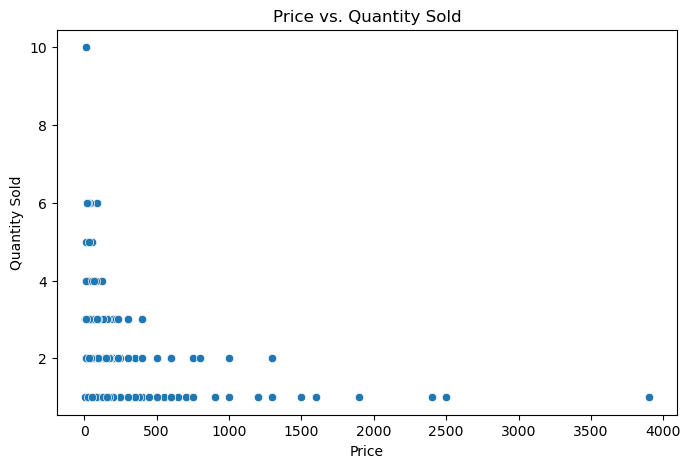

,Unit Price,Units Sold
Unit Price,1.000000,-0.308583
Units Sold,-0.308583,1.000000


In [68]:
# Scatter plot: Price vs. Quantity Sold
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=df['Unit Price'], y=df['Units Sold'])
plt.title("Price vs. Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Quantity Sold")
plt.show()

df[['Unit Price','Units Sold']].corr()

In [73]:
x=df[['Unit Price']]
y=df['Units Sold']

In [83]:
# BUILDING LINEAR REGRESSION MODEL

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [75]:
lr.fit(x,y)

LinearRegression()

In [76]:
df['Predicted_Units'] = model.predict(x)


In [77]:
mse = mean_squared_error(y, data['Predicted_Units'])
r2 = r2_score(y, data['Predicted_Units'])
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.5757566999859436
R-squared: 0.09522323538428201


In [85]:
# OPTIMIZING PRICE

In [78]:
# Calculate Revenue
df['Revenue'] = data['Unit Price'] * data['Units Sold']


In [79]:
# Find optimal price (max revenue)
optimal_price = df.groupby('Unit Price')['Revenue'].sum().idxmax()
max_revenue = df['Revenue'].max()
print(f"Optimal Price: {optimal_price}")
print(f"Maximum Revenue: {max_revenue}")

Optimal Price: 399.99
Maximum Revenue: 3899.99


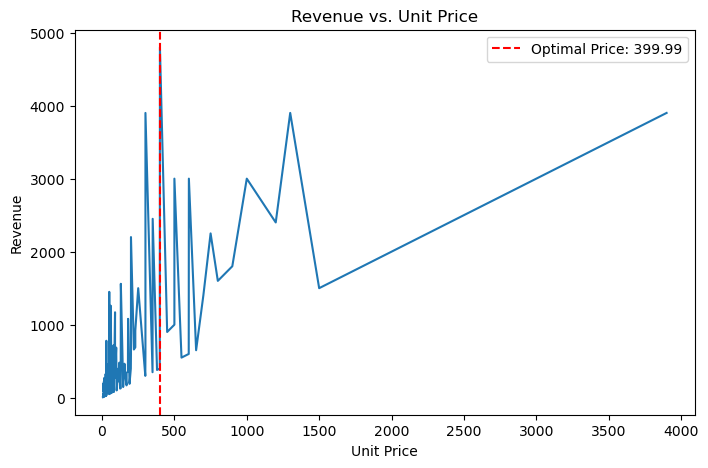

In [80]:
# Plot Revenue vs. Unit Price
plt.figure(figsize=(8, 5))
sns.lineplot(data=df.groupby('Unit Price')['Revenue'].sum().reset_index(), x='Unit Price', y='Revenue')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price}')
plt.title("Revenue vs. Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Revenue")
plt.legend()
plt.show()